<a href="https://colab.research.google.com/github/RepnaiaE/DataScience_functional-state-analysis/blob/main/Wavelet_transform_of_physiological_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4
## Вейвлет-преобразование физиологических сигналов/Wavelet transform of physiological signals


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, rfftfreq
from scipy.interpolate import CubicSpline

# I. Подготовка исходных данных/Initial data preparation

## Чтение данных/Read Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ИТМО/Функциональные состояния/Lab4/2_f_2.csv', names = ['data'])
x = data.data.to_numpy()

## Интерполяция/Interpolation

In [ ]:
y = data.data.to_numpy()
y = x
x = list(range(0, len(y)))

cs = CubicSpline(x, y)
delta_t = 0.25
duration = 300

x = list(np.arange(0, 300, delta_t))
x = cs(x)

# II. Вейвлет преобразование/Wavelet transform

## Преобразования/Transforms

In [ ]:
import pywt

# Функция возвращает матрицу прямого вейвлет-преобразования (cwt), матрицу обратного вейвлет-преобразования (icwt)
# и соответствующий вектор частот
# Аргументы - интерполированный сигнал, название базисной вейвлет-функции (w),
# нижняя и верхняя граница частотного диапазона (f1, f2) и частота дискретизации D
def get_wavelets(signal, w, f1, f2, D):
    fc = pywt.central_frequency(w)

    a1 = fc/(D*f1)
    a2 = fc/(D*f2)
    lna1 = np.log(a1)
    lna2 = np.log(a2)
    ln_a = np.linspace(lna1, lna2, 100)

    A = np.exp(ln_a)
    F = fc/(D*A)

    dA = np.zeros(A.shape)
    dA = np.diff(A)
    dA = dA.tolist()
    dA.append(dA[-1])

    cwt, frq = pywt.cwt(signal - np.mean(signal), A, w)
    icwt = np.transpose(np.multiply(np.transpose(cwt), dA/pow(A,1.5)))

    return cwt, icwt, F

In [ ]:
def calc_std(HF, LF, VLF):
    SDHF = np.std(HF)
    SDLF = np.std(LF)
    SDVLF = np.std(VLF)
    print(f'SDHF = {SDHF:.3f}')
    print(f'SDLF = {SDLF:.3f}')
    print(f'SDVLF = {SDVLF:.3f}')

    return SDHF, SDLF, SDVLF

In [ ]:
def calc_params(xf, yf):
    hf_indexes = [i for i, v in enumerate(xf) if v >= 0.15 and v <= 0.4]

    HF_values = sum([np.abs(yf)[i] for i in hf_indexes])
    HF = np.mean(HF_values)

    # print(f"HF min = {int(min(HF_values)):.3f}, HF max = {int(max(HF_values)):.3f}")
    print(F"HF (суммарная мощность) = {HF:.3f}")

    lf_indexes = [i for i, v in enumerate(xf) if v >= 0.04 and v < 0.15]

    LF_values = sum([np.abs(yf)[i] for i in lf_indexes])
    LF = np.mean(LF_values)

    # print(f"LF min = {int(min(LF_values)):.3f}, LF max = {int(max(LF_values)):.3f}")
    print(F"LF (суммарная мощность) = {LF:.3f}")

    vlf_indexes = [i for i, v in enumerate(xf) if v >= 0.015 and v < 0.04]

    VLF_values = sum([np.abs(yf)[i] for i in vlf_indexes])
    VLF = np.mean(VLF_values)

    # print(f"VLF min = {int(min(VLF_values)):.3f}, VLF max = {int(max(VLF_values)):.3f}")
    print(F"VLF (суммарная мощность) = {VLF:.3f}")

    SDHF, SDLF, SDVLF = calc_std(HF_values, LF_values, VLF_values)

    return HF, LF, VLF, SDHF, SDLF, SDVLF

In [ ]:
def calc_percents(HF, LF, VLF, TP):
    HF_percents = HF / TP * 100
    LF_percents = LF / TP * 100
    VLF_percents = VLF / TP * 100

    print(f"HF% = {HF_percents:.1f}%")
    print(f"LF% = {LF_percents:.1f}%")
    print(f"VLF% = {VLF_percents:.1f}%")

    return HF_percents, LF_percents, VLF_percents

## Преобразование Гаусса 1/Gaussian Transform 1

In [ ]:
w = 'gaus1'
signal = x
D = 1 / delta_t

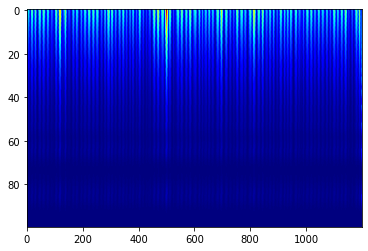

In [ ]:
f1, f2 = 0.015, 0.4

cwt, icwt, F = get_wavelets(signal, w, f1, f2, D)
plt.imshow(np.abs(cwt), cmap='jet', aspect='auto')

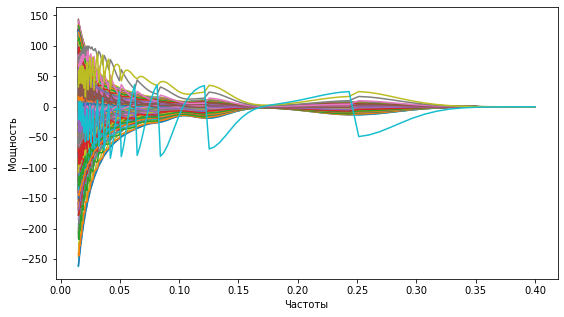

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, cwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

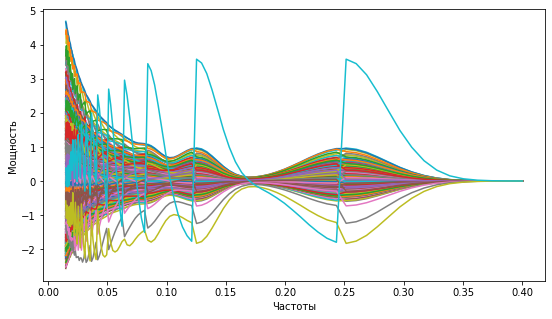

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, icwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

In [ ]:
HF, LF, VLF, SDHF, SDLF, SDVLF = calc_params(F, icwt)

HF (суммарная мощность) = 2.844
LF (суммарная мощность) = 12.199
VLF (суммарная мощность) = 24.578
SDHF = 1.890
SDLF = 7.539
SDVLF = 14.319


In [ ]:
TP = HF + LF + VLF
print(f"TP (суммарная мощность) = {TP:.3f}")

TP (суммарная мощность) = 39.621


In [ ]:
HF_percents, LF_percents, VLF_percents = calc_percents(HF, LF, VLF, TP)

HF% = 7.2%
LF% = 30.8%
VLF% = 62.0%


In [ ]:
IBB = LF / HF
print(f"IBB (индекс вегетативного баланса) = {IBB:.3f}")

IBB (индекс вегетативного баланса) = 4.289


## Преобразование Гаусса 4/Gaussian Transform 4

In [ ]:
w = 'gaus4'
signal = x
D = 1 / delta_t

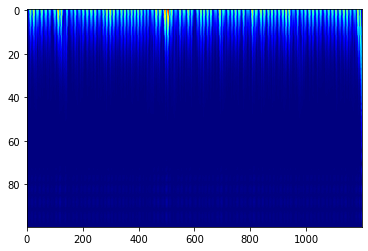

In [ ]:
f1, f2 = 0.015, 0.4

cwt, icwt, F = get_wavelets(signal, w, f1, f2, D)
plt.imshow(np.abs(cwt), cmap='jet', aspect='auto')

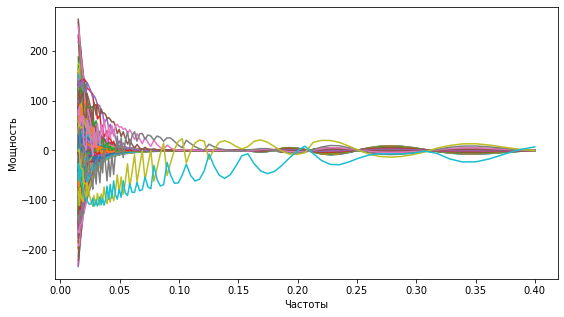

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, cwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

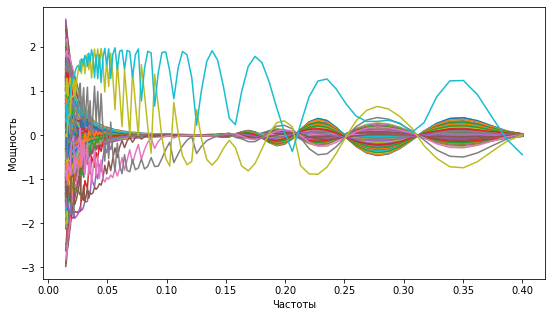

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, icwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

In [ ]:
HF, LF, VLF, SDHF, SDLF, SDVLF = calc_params(F, icwt)

HF (суммарная мощность) = 1922.029
LF (суммарная мощность) = 922.899
VLF (суммарная мощность) = 13094.033
SDHF = 1.137
SDLF = 2.251
SDVLF = 6.276


In [ ]:
TP = HF + LF + VLF
print(f"TP (суммарная мощность) = {TP:.3f}")

TP (суммарная мощность) = 15938.962


In [ ]:
HF_percents, LF_percents, VLF_percents = calc_percents(HF, LF, VLF, TP)

HF% = 12.1%
LF% = 5.8%
VLF% = 82.2%


In [ ]:
IBB = LF / HF
print(f"IBB (индекс вегетативного баланса) = {IBB:.3f}")

IBB (индекс вегетативного баланса) = 0.480


## Преобразование Гаусса 8/Gaussian Transform 8

In [ ]:
w = 'gaus8'
signal = x
D = 1 / delta_t

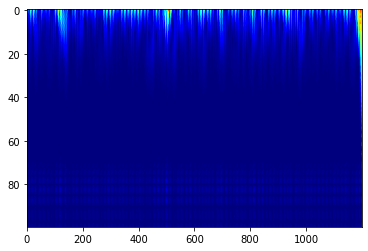

In [ ]:
f1, f2 = 0.015, 0.4

cwt, icwt, F = get_wavelets(signal, w, f1, f2, D)
plt.imshow(np.abs(cwt), cmap='jet', aspect='auto')

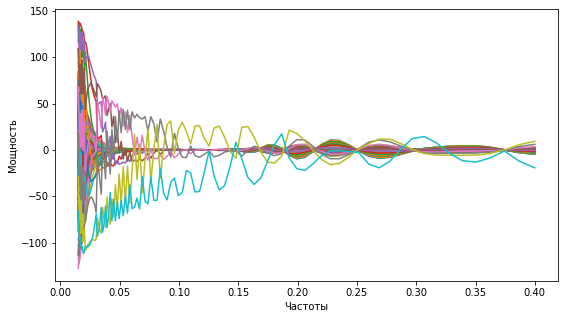

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, cwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

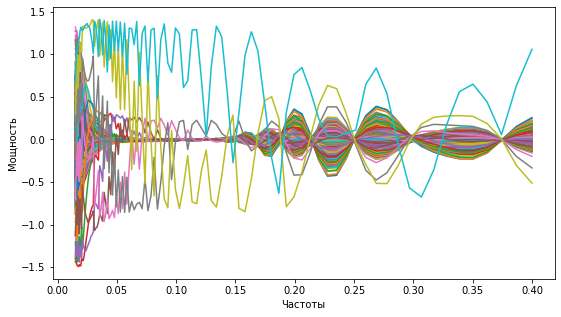

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, icwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

In [ ]:
HF, LF, VLF, SDHF, SDLF, SDVLF = calc_params(F, icwt)

HF (суммарная мощность) = 1780.120
LF (суммарная мощность) = 291.820
VLF (суммарная мощность) = 3441.852
SDHF = 0.970
SDLF = 1.520
SDVLF = 2.696


In [ ]:
TP = HF + LF + VLF
print(f"TP (суммарная мощность) = {TP:.3f}")

TP (суммарная мощность) = 5513.792


In [ ]:
HF_percents, LF_percents, VLF_percents = calc_percents(HF, LF, VLF, TP)

HF% = 32.3%
LF% = 5.3%
VLF% = 62.4%


In [ ]:
IBB = LF / HF
print(f"IBB (индекс вегетативного баланса) = {IBB:.3f}")

IBB (индекс вегетативного баланса) = 0.164


## Преобразование мексиканская шляпа/Transform mexican hat



In [ ]:
w = 'mexh'
signal = x
D = 1 / delta_t

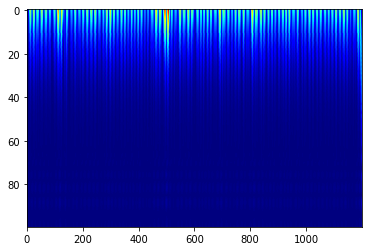

In [ ]:
f1, f2 = 0.015, 0.4

cwt, icwt, F = get_wavelets(signal, w, f1, f2, D)
plt.imshow(np.abs(cwt), cmap='jet', aspect='auto')

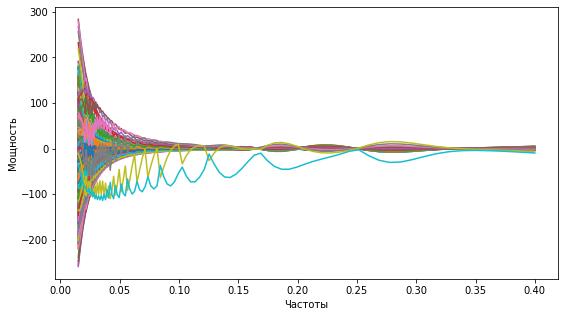

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, cwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

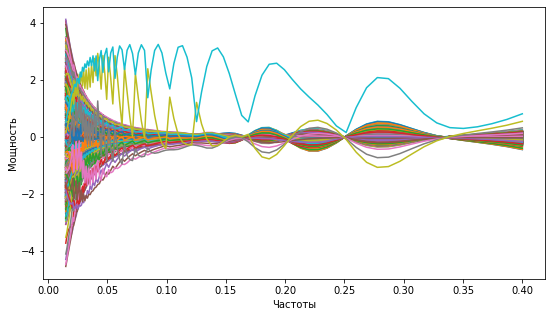

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, icwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

In [ ]:
HF, LF, VLF, SDHF, SDLF, SDVLF = calc_params(F, icwt)

HF (суммарная мощность) = 2515.352
LF (суммарная мощность) = 5924.049
VLF (суммарная мощность) = 29333.074
SDHF = 1.564
SDLF = 4.349
SDVLF = 13.223


In [ ]:
TP = HF + LF + VLF
print(f"TP (суммарная мощность) = {TP:.3f}")

TP (суммарная мощность) = 37772.476


In [ ]:
HF_percents, LF_percents, VLF_percents = calc_percents(HF, LF, VLF, TP)

HF% = 6.7%
LF% = 15.7%
VLF% = 77.7%


In [ ]:
IBB = LF / HF
print(f"IBB (индекс вегетативного баланса) = {IBB:.3f}")

IBB (индекс вегетативного баланса) = 2.355


## Преобразование Морле/Morlet transform

In [ ]:
w = 'morl'
signal = x
D = 1 / delta_t

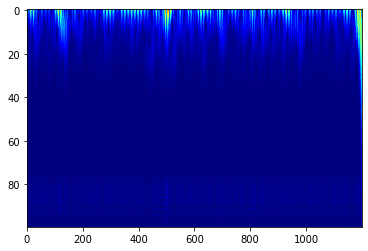

In [ ]:
f1, f2 = 0.015, 0.4

cwt, icwt, F = get_wavelets(signal, w, f1, f2, D)
plt.imshow(np.abs(cwt), cmap='jet', aspect='auto')

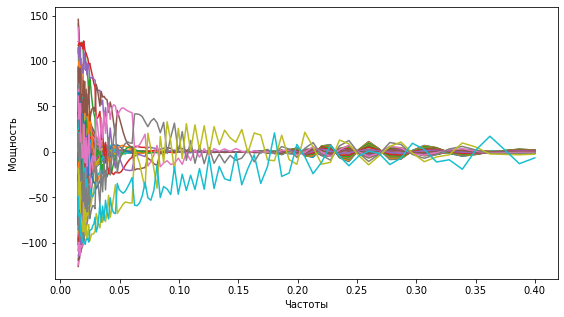

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, cwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

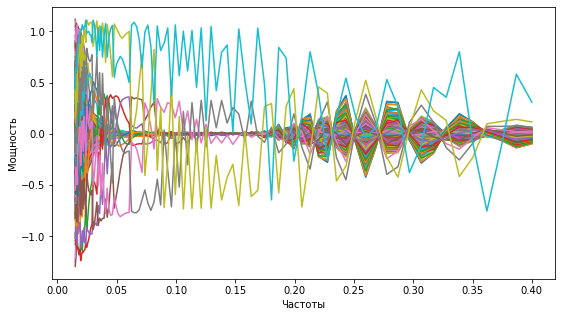

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(F, icwt)
ax.set_xlabel('Частоты')
ax.set_ylabel('Мощность')
plt.show()

In [ ]:
HF, LF, VLF, SDHF, SDLF, SDVLF = calc_params(F, icwt)

HF (суммарная мощность) = 1346.180
LF (суммарная мощность) = 287.940
VLF (суммарная мощность) = 3629.702
SDHF = 0.756
SDLF = 1.289
SDVLF = 2.465


In [ ]:
TP = HF + LF + VLF
print(f"TP (суммарная мощность) = {TP:.3f}")

TP (суммарная мощность) = 5263.822


In [ ]:
HF_percents, LF_percents, VLF_percents = calc_percents(HF, LF, VLF, TP)

HF% = 25.6%
LF% = 5.5%
VLF% = 69.0%


In [ ]:
IBB = LF / HF
print(f"IBB (индекс вегетативного баланса) = {IBB:.3f}")

IBB (индекс вегетативного баланса) = 0.214


# III. Вывод/Conclusion

| Преобразование | HF | LF | VLF | IBB |
| --- | --- | --- | --- | --- |
| Гаусс 1 | 7.2% | 30.8% | 62.0% | 4.289 |
| Гаусс 4 | 12.1% | 5.8% | 82.2% | 0.480 |
| Гаусс 8 | 32.3% | 5.3% | 62.4% | 0.164 |
| Мексиканская шляпа | 6.7% | 15.7% | 77.7% | 2.355 |
| Морле | 25.6% | 5.5% | 69.0% | 0.214 |

Результаты значительно отличаются при выборе различных методов преобразования.

Как правило, меняется распределение между высокими (HF) и низкими (LF) частотами. Очень низкие частоты (VLF) стабильно преобладают в любом типе преобразования.

По индексу IBB наиболее близким к результатам преобразования Фурье является преобразование Морле.

The results vary considerably when choosing different conversion methods.

As a rule, the distribution between high (HF) and low (LF) frequencies changes. Very low frequencies (VLF) are consistently dominant in any type of conversion.

According to the IBB index, the closest to the results of the Fourier transform is the Morlet transform.